In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [2]:
df = pd.read_excel("RAW_FCM__Problems_Alone_7.1.2019.xlsx")

In [3]:
df.columns = df.iloc[1]

In [4]:
df=df.iloc[2:]

In [5]:
text=df['Description of targeted problem/issue_703']


In [6]:
text=text.dropna().values.tolist()

In [7]:
len(text)
text

['needs a job',
 'needs to get back into school',
 'needs to be in school',
 'wants to expunge her record',
 'needs a job client is a foster kid and her foster mom takes all her money',
 'has poor grades and want to get better grades',
 "client don't believe in herself",
 'needs to find a college to enroll into because she will soon be finish with high school',
 'she needs someone to talk to about her step father murder its only been a few months.',
 'need resume for job interview',
 'needs a job so he can have money',
 'client has a lot of issues he is a foster kid and he been looking for his real mom and always thought of finding his siblings if he had any.',
 'Client moved from out of state to California for a better opportunity and I referred client to Worksource Center',
 'LOW SELF ESTEEM',
 'Client has girl drama at school with gossiping CM will have Individual Sessions for Anger Management',
 'client is pregnant and needs assistance ',
 'exit',
 "CLient and mother got into a fig

In [8]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=2**10)
X = vectorizer.fit_transform(text)
X.shape

(12294, 1024)

In [12]:
pca = PCA(n_components=10)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(12294, 10)

In [ ]:
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [ ]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

5 clusters

In [12]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 12294 samples in 7.790s...
[t-SNE] Computed neighbors for 12294 samples in 282.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12294
[t-SNE] Computed conditional probabilities for sample 2000 / 12294
[t-SNE] Computed conditional probabilities for sample 3000 / 12294
[t-SNE] Computed conditional probabilities for sample 4000 / 12294
[t-SNE] Computed conditional probabilities for sample 5000 / 12294
[t-SNE] Computed conditional probabilities for sample 6000 / 12294
[t-SNE] Computed conditional probabilities for sample 7000 / 12294
[t-SNE] Computed conditional probabilities for sample 8000 / 12294
[t-SNE] Computed conditional probabilities for sample 9000 / 12294
[t-SNE] Computed conditional probabilities for sample 10000 / 12294
[t-SNE] Computed conditional probabilities for sample 11000 / 12294
[t-SNE] Computed conditional probabilities for sample 12000 / 12294
[t-SNE] Computed conditional probabilities for 

In [14]:
df = df[df['Description of targeted problem/issue_703'].notna()]

In [15]:
df.shape

(12294, 37)

In [17]:
y_pred = model.fit_predict(X)
df['classification']=y_pred

In [18]:
#0 face spme kind of problem
#1 id, work related isssues
#2 gang related issues
#3 need something
#4 anger related issues

dictt  = {0:"face spme kind of problem", 1:"id, work related isssues", 2:"gang related issues", 3: "need something", 
 4:"anger related issues"}



In [19]:
df["class"] = df["classification"].map(dictt)

In [20]:
df.head()

1,Program Name,Participant Site Identifier,Subject Unique Identifier,FCM: GRYD Client ID,Client ID (Agency Acronym) FCM,Client ID (Additional Agency Info) FCM,Client ID (Referral #) FCM,Client ID (Return Count) FCM,Old format GRYD ID,Referral Date_133,...,EntityName_202,Assigned CIW FCM:_203,EntityName_203,Select Client Type_1263,Current Cycle_208,Current Phase_209,Description of targeted problem/issue_703,SET Feedback Category that this problem relates to_1415,classification,class
2,FCM - 77th 1,29733,24978,77th 1-16-30-1,77th 1,16,30,1,DO-0-030-1,2015-10-16 00:00:00,...,Reina Carrillo,5089,Mark Martin,FCM,1,3,needs a job,Self-Investment,1,"id, work related isssues"
3,FCM - 77th 1,32518,28122,77th 1-16-37-2,77th 1,16,37,2,DO-0-037-2,2015-11-19 00:00:00,...,Reina Carrillo,5089,Mark Martin,FCM,1,2,needs to get back into school,Self-Investment,1,"id, work related isssues"
4,FCM - 77th 1,31027,26464,77th 1-16-39-1,77th 1,16,39,1,DO-0-039-1,2016-01-29 00:00:00,...,Reina Carrillo,5541,No CIW Assigned,FCM,1,2,needs to be in school,Self-Investment,1,"id, work related isssues"
5,FCM - 77th 1,48034,45531,77th 1-16-40-2,77th 1,16,40,2,DO-0-040-1,2018-11-06 00:00:00,...,Reina Carrillo,NaN,NaN,FCM,1,2,wants to expunge her record,Self-Investment,0,face spme kind of problem
6,FCM - 77th 1,31234,26696,77th 1-16-45-1,77th 1,16,45,1,DO-0-045-1,2016-01-28 00:00:00,...,Reina Carrillo,5541,No CIW Assigned,FCM,1,5,needs a job client is a foster kid and her fos...,Self-Investment,1,"id, work related isssues"


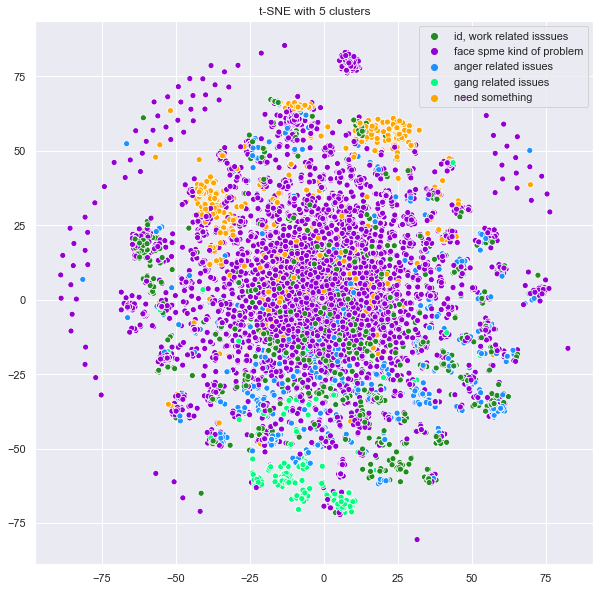

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})

color_dict = dict({'face spme kind of problem':'darkviolet',
                  'id, work related isssues':'forestgreen',
                  'need something': 'orange',
                  'gang related issues': 'springgreen',
                  'anger related issues': 'dodgerblue',})


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=df['class'].values, legend='full', palette=color_dict)
plt.title('t-SNE with {} clusters'.format(k))
plt.show()

In [22]:
score=pd.read_csv('full_embeddedness.csv')

In [23]:
score

,ID,admin,age,sex,zone,gang,family,other,risk
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080
3,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084
4,Southeast 3-10-17-1,1,24.0,2,21.0,-8.583601,6.626468,1.413228,-1.421399
...,...,...,...,...,...,...,...,...,...
2760,Southwest 2-23-280-1,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
2761,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
2762,Mission-14-413-1,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
2763,77th 3-20-376-1,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


In [24]:
df=df.rename(columns={'FCM: GRYD Client ID':'ID','Description of targeted problem/issue_703':'problem'})
df=df.loc[:,['ID','problem','class']]
df.head()

1,ID,problem,class
2,77th 1-16-30-1,needs a job,"id, work related isssues"
3,77th 1-16-37-2,needs to get back into school,"id, work related isssues"
4,77th 1-16-39-1,needs to be in school,"id, work related isssues"
5,77th 1-16-40-2,wants to expunge her record,face spme kind of problem
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,"id, work related isssues"


In [25]:
df = pd.merge(left=df, right=score, left_on='ID', right_on='ID')

In [43]:
df.shape

(5128, 11)

Text(0.5, 1, 'correlation plot')

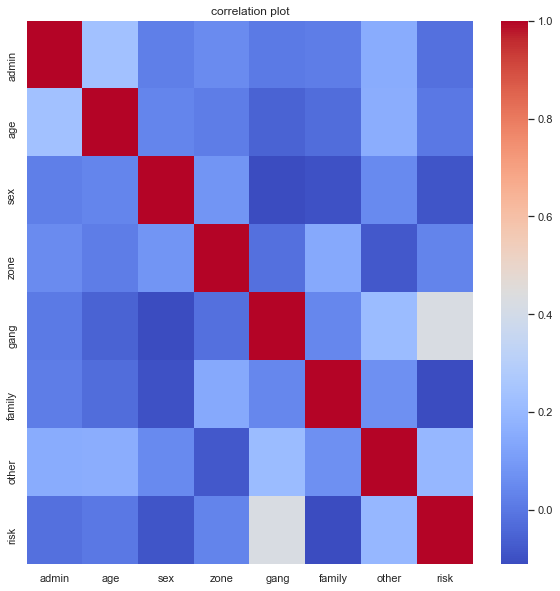

In [27]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('correlation plot')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

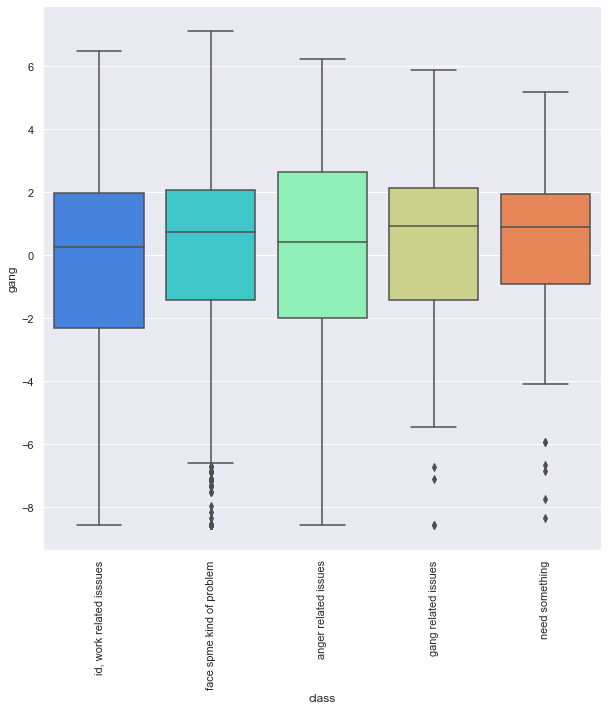

In [39]:
sns.boxplot(x='class',y='gang',data=df,palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

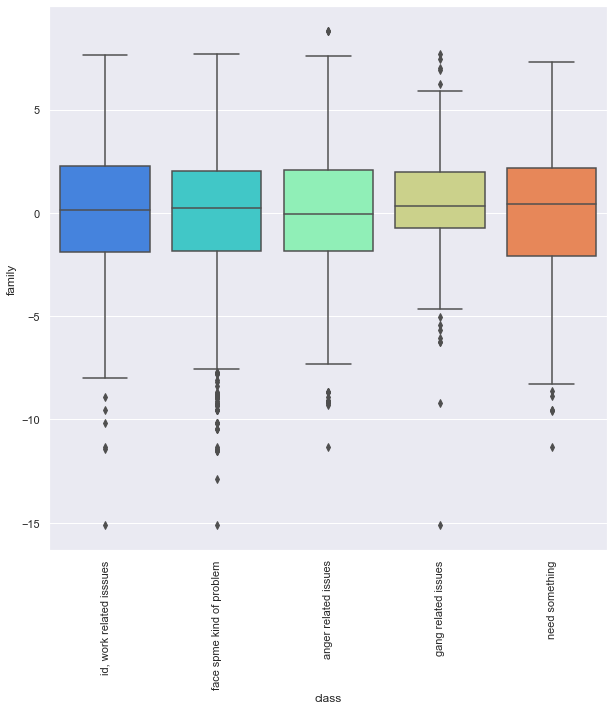

In [31]:
sns.boxplot(x='class',y='family',data=df,palette='rainbow')
plt.xticks(rotation=90)

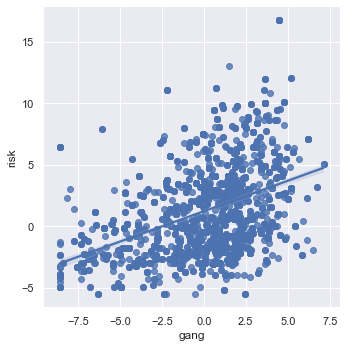

In [390]:
sns.lmplot(x='gang',y='risk',data=df,palette='coolwarm')

In [50]:
strategy = pd.read_excel("RAW_FCM__Problems_and_Strategies_7.1.2019.xlsx")
strategy.columns = strategy.iloc[1]
strategy=strategy.iloc[2:]

In [51]:
strategy=strategy.iloc[:,[3,46,57]]

In [52]:
strategy=strategy.dropna()

In [54]:
strategy=strategy.rename(columns={'FCM: GRYD Client ID':'ID','Strategy recommended to address this problem_928':'strategy','Progress made? (select one)_934':'progress'})

In [55]:
strategy

1,ID,strategy,progress
5,77th 1-16-40-2,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,referred him to in-house services through SEA ...,A Little progress
...,...,...,...
15744,Southwest 2-23-324-1,life skill class 1 time aweek,A Little progress
15745,Southwest 2-23-324-1,referring client to shelter for families,A Little progress
15746,Southwest 2-23-326-1,CM will conduct individual counseling.,Some progress
15747,Southwest 2-23-327-1,CM will provide counselling session with client.,Good progress


In [56]:
text=strategy['strategy']
text=text.dropna().values.tolist()

In [180]:
vectorizer = TfidfVectorizer(stop_words='english',min_df=2,max_df=0.8,ngram_range=(1,2))
X = vectorizer.fit_transform(text)
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

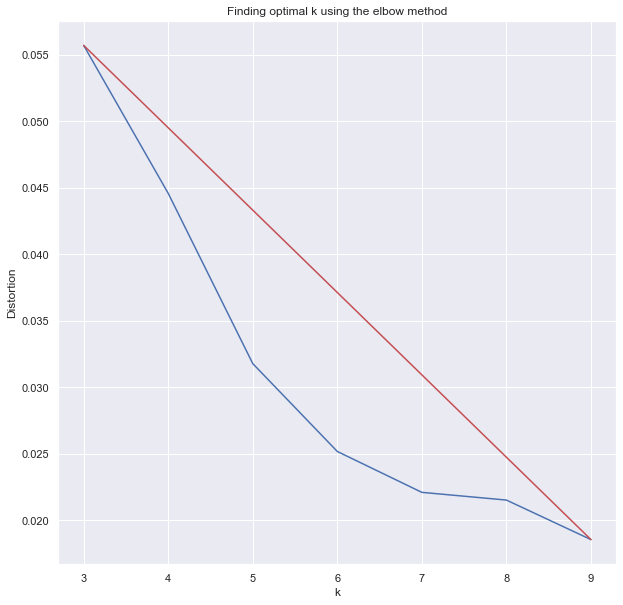

In [181]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [182]:
k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [183]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4039 samples in 8.187s...
[t-SNE] Computed neighbors for 4039 samples in 238.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4039
[t-SNE] Computed conditional probabilities for sample 2000 / 4039
[t-SNE] Computed conditional probabilities for sample 3000 / 4039
[t-SNE] Computed conditional probabilities for sample 4000 / 4039
[t-SNE] Computed conditional probabilities for sample 4039 / 4039
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.740608
[t-SNE] KL divergence after 1000 iterations: 1.508456


In [61]:
y_pred = model.fit_predict(X)
strategy['classification']=y_pred

In [153]:
dictt  = {0:"other", 1:"4d development", 2:"employment, program, participation", 3: "supports", 
 4:"consistent counseling",5:'workshop'}

#0 other
#1 4d development
#2 employment, program, participation
#3 supports
#4 consistent counseling
#5 workshop


In [163]:
strategy["class of strategy"] = strategy["classification"].map(dictt)

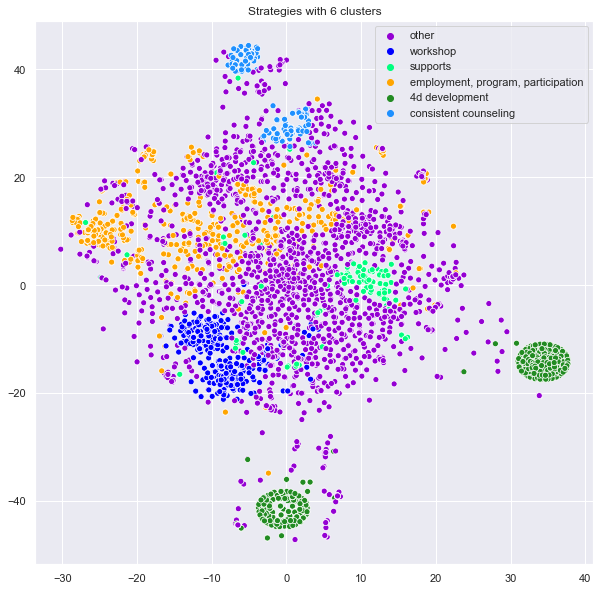

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})

color_dict = dict({'other':'darkviolet',
                  '4d development':'forestgreen',
                  'employment, program, participation': 'orange',
                  'supports': 'springgreen',
                  'consistent counseling': 'dodgerblue',
                  'workshop':'blue'})


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=strategy['class'].values, legend='full', palette=color_dict)
plt.title('Strategies with {} clusters'.format(k))
plt.show()

In [164]:
strategy=strategy.drop(columns=['classification'])

In [166]:
strategy=strategy.drop(columns=['class'])

In [168]:
temp = pd.merge(left=strategy, right=df, left_on='ID', right_on='ID')

In [291]:
temp=temp.rename(columns={'class':'class of problem'})
temp.shape

(10418, 14)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

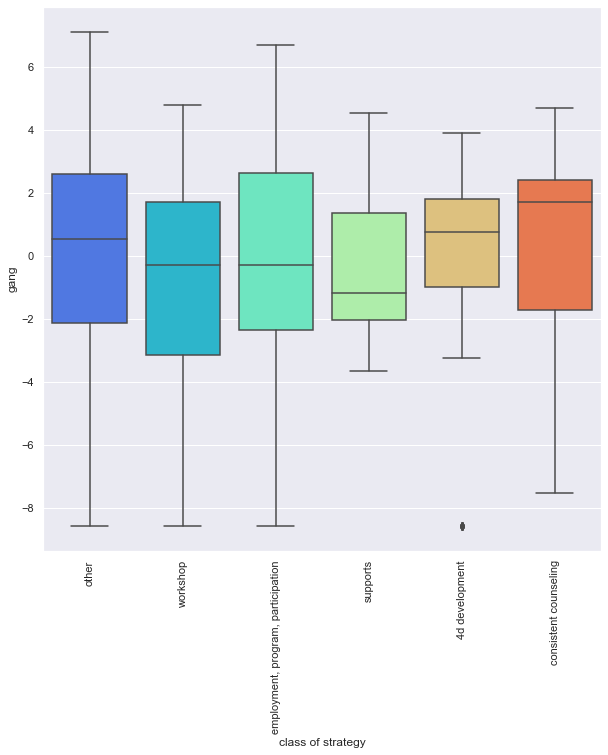

In [206]:
sns.boxplot(x='class of strategy',y='gang',data=temp,palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

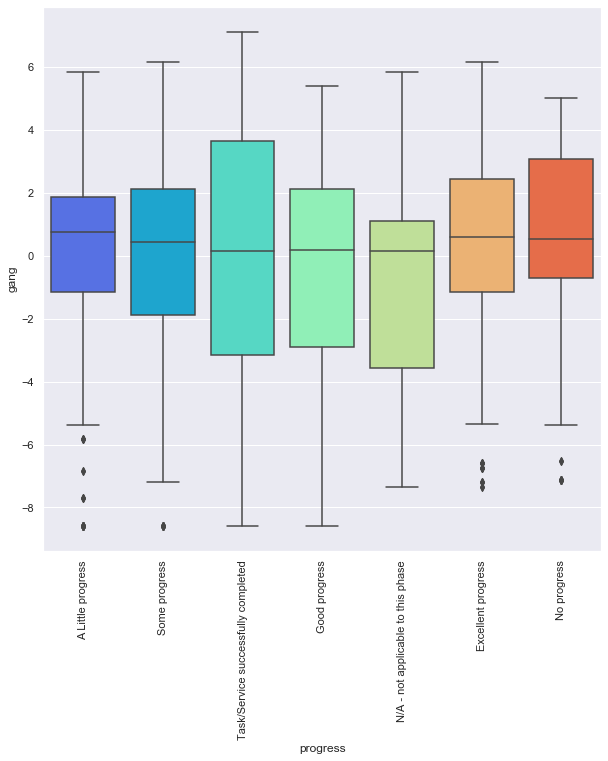

In [248]:
sns.boxplot(x='progress',y='gang',data=temp,palette='rainbow')
plt.xticks(rotation=90)

In [342]:
new=pd.read_csv('FCM_Problems_and_Strategies_with_labels2.csv')

In [343]:
new = pd.merge(left=new.drop_duplicates(), right=df.drop_duplicates(), on='ID', how='inner')


In [344]:
new=new.drop(columns={'Classification'})

In [399]:
new.head()

,ID,Strategy,Progress,Strategy_Label,problem,class,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-64-1,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
1,77th 1-16-64-1,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,2,17.0,1,1.0,-1.619353,-0.649773,0.524949,-1.745610
2,77th 1-16-81-1,life skills- self love,Some progress,substance abuse/anger management/life skill,LOW SELF ESTEEM,face spme kind of problem,1,18.0,2,1.0,0.564769,1.581231,NaN,-0.432885
3,77th 1-16-81-1,life skills- self love,Some progress,substance abuse/anger management/life skill,LOW SELF ESTEEM,face spme kind of problem,2,18.0,2,1.0,-2.870912,-0.007304,-1.015941,-2.667042
4,77th 1-16-95-1,one on one anger management skills,Task/Service successfully completed,substance abuse/anger management/life skill,Client has girl drama at school with gossiping...,face spme kind of problem,1,17.0,2,1.0,1.874593,-1.282688,NaN,2.209041


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

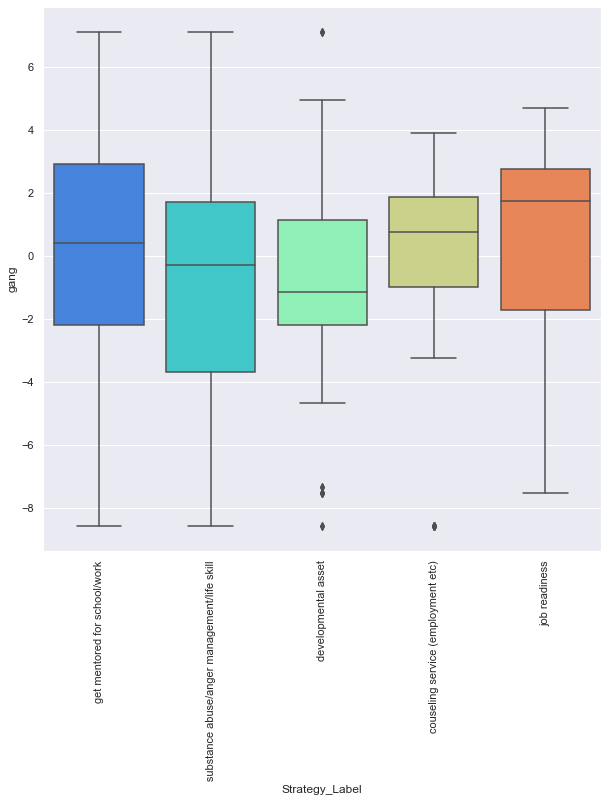

In [400]:
sns.boxplot(x='Strategy_Label',y='gang',data=new,palette='rainbow')
plt.xticks(rotation=90)

In [401]:
new.to_csv('problem,strategy.csv', index = False)

In [380]:
intake=pd.read_csv('full_intake.csv')

In [381]:
retake=pd.read_csv('full_retake.csv')

In [382]:
full = pd.merge(left=intake, right=retake, left_on='ID', right_on='ID')
full=full.loc[:,['ID',"gang_x",'gang_y']]
full=full.rename(columns={'gang_x':'gang_intake','gang_y':'gang_retake'})

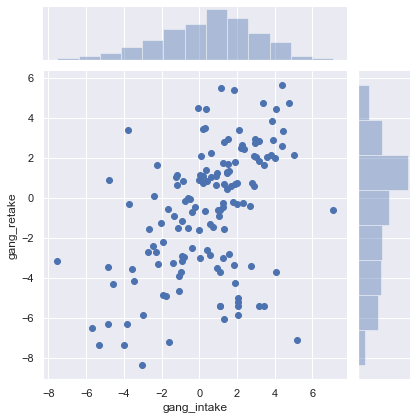

In [383]:
sns.jointplot(x='gang_intake',y='gang_retake',data=full)

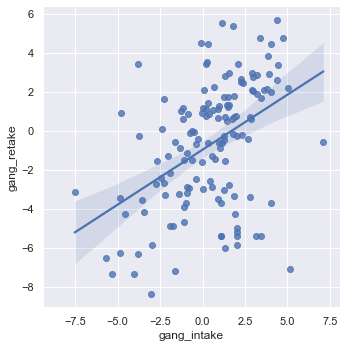

In [384]:
sns.lmplot(x='gang_intake',y='gang_retake',data=full,palette='coolwarm')

In [398]:
full=full[full['gang_intake'].notna()]

new

,ID,Strategy,Progress,Strategy_Label,problem,class,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-64-1,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
1,77th 1-16-64-1,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,2,17.0,1,1.0,-1.619353,-0.649773,0.524949,-1.745610
2,77th 1-16-81-1,life skills- self love,Some progress,substance abuse/anger management/life skill,LOW SELF ESTEEM,face spme kind of problem,1,18.0,2,1.0,0.564769,1.581231,NaN,-0.432885
3,77th 1-16-81-1,life skills- self love,Some progress,substance abuse/anger management/life skill,LOW SELF ESTEEM,face spme kind of problem,2,18.0,2,1.0,-2.870912,-0.007304,-1.015941,-2.667042
4,77th 1-16-95-1,one on one anger management skills,Task/Service successfully completed,substance abuse/anger management/life skill,Client has girl drama at school with gossiping...,face spme kind of problem,1,17.0,2,1.0,1.874593,-1.282688,NaN,2.209041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,Southwest 2-23-277-1,cm developed a plan that client is to attend a...,Some progress,get mentored for school/work,Client is currently on probation.,face spme kind of problem,1,18.0,1,23.0,NaN,-1.701536,NaN,0.870485
9050,Southwest 2-23-278-1,cm has developed a plan for client to attend a...,Some progress,get mentored for school/work,Client is currently on probation.,face spme kind of problem,1,15.0,1,23.0,NaN,-3.189209,NaN,0.674581
9051,Southwest 2-23-279-1,cm will conducted workshops needed for client ...,Good progress,get mentored for school/work,Client is currently on probation.,face spme kind of problem,1,18.0,2,23.0,NaN,-0.818635,NaN,2.572766
9052,Southwest 2-23-280-1,cm will provide client with substance abuse wo...,Good progress,substance abuse/anger management/life skill,Client is currently on probation.,face spme kind of problem,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042


In [396]:
xx=pd.merge(left=full.drop_duplicates(), right=new.drop_duplicates(), on='ID', how='inner')
xx

,ID,gang_intake,gang_retake,Strategy,Progress,Strategy_Label,problem,class,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-110-1,1.277710,-3.026147,refer her to a youth pastor,Good progress,get mentored for school/work,CLient and mother got into a fight and she got...,face spme kind of problem,1,15.0,2,1.0,1.277710,1.478281,NaN,2.806262
1,77th 1-16-110-1,1.277710,-3.026147,refer her to a youth pastor,Good progress,get mentored for school/work,CLient and mother got into a fight and she got...,face spme kind of problem,2,16.0,2,1.0,-3.026147,-6.267490,2.991683,-2.378043
2,77th 1-16-114-1,-0.369860,-2.493864,cm will have her start job readiness program i...,Task/Service successfully completed,get mentored for school/work,she needs a job/issue is she never attended a ...,"id, work related isssues",1,16.0,2,1.0,-0.369860,-2.322409,NaN,-0.246181
3,77th 1-16-114-1,-0.369860,-2.493864,cm will have her start job readiness program i...,Task/Service successfully completed,get mentored for school/work,she needs a job/issue is she never attended a ...,"id, work related isssues",2,16.0,2,1.0,-2.493864,-1.379609,1.227434,-1.800047
4,77th 1-16-64-1,-0.014132,-1.619353,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,client is gang involved,face spme kind of problem,2,16.0,1,23.0,-0.603983,-3.795381,-3.826155,-0.270431
1490,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,Client has to complete 50 hours of community s...,face spme kind of problem,1,17.0,1,23.0,7.122937,-6.420269,NaN,5.043917
1491,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,Client has to complete 50 hours of community s...,face spme kind of problem,2,16.0,1,23.0,-0.603983,-3.795381,-3.826155,-0.270431
1492,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,client wants to learn how to a prepare for a job.,face spme kind of problem,1,17.0,1,23.0,7.122937,-6.420269,NaN,5.043917


In [391]:
xx=xx[

,ID,gang_intake,gang_retake,Strategy,Progress,Strategy_Label,problem,class,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-110-1,1.277710,-3.026147,refer her to a youth pastor,Good progress,get mentored for school/work,CLient and mother got into a fight and she got...,face spme kind of problem,1,15.0,2,1.0,1.277710,1.478281,NaN,2.806262
1,77th 1-16-110-1,1.277710,-3.026147,refer her to a youth pastor,Good progress,get mentored for school/work,CLient and mother got into a fight and she got...,face spme kind of problem,2,16.0,2,1.0,-3.026147,-6.267490,2.991683,-2.378043
2,77th 1-16-114-1,-0.369860,-2.493864,cm will have her start job readiness program i...,Task/Service successfully completed,get mentored for school/work,she needs a job/issue is she never attended a ...,"id, work related isssues",1,16.0,2,1.0,-0.369860,-2.322409,NaN,-0.246181
3,77th 1-16-114-1,-0.369860,-2.493864,cm will have her start job readiness program i...,Task/Service successfully completed,get mentored for school/work,she needs a job/issue is she never attended a ...,"id, work related isssues",2,16.0,2,1.0,-2.493864,-1.379609,1.227434,-1.800047
4,77th 1-16-64-1,-0.014132,-1.619353,referred him to in-house services through sea ...,A Little progress,get mentored for school/work,client has a lot of issues he is a foster kid ...,face spme kind of problem,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,client is gang involved,face spme kind of problem,2,16.0,1,23.0,-0.603983,-3.795381,-3.826155,-0.270431
1490,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,Client has to complete 50 hours of community s...,face spme kind of problem,1,17.0,1,23.0,7.122937,-6.420269,NaN,5.043917
1491,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,Client has to complete 50 hours of community s...,face spme kind of problem,2,16.0,1,23.0,-0.603983,-3.795381,-3.826155,-0.270431
1492,Southwest 2-23-92-1,7.122937,-0.603983,cm will refer client to job readiness.,Task/Service successfully completed,get mentored for school/work,client wants to learn how to a prepare for a job.,face spme kind of problem,1,17.0,1,23.0,7.122937,-6.420269,NaN,5.043917


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

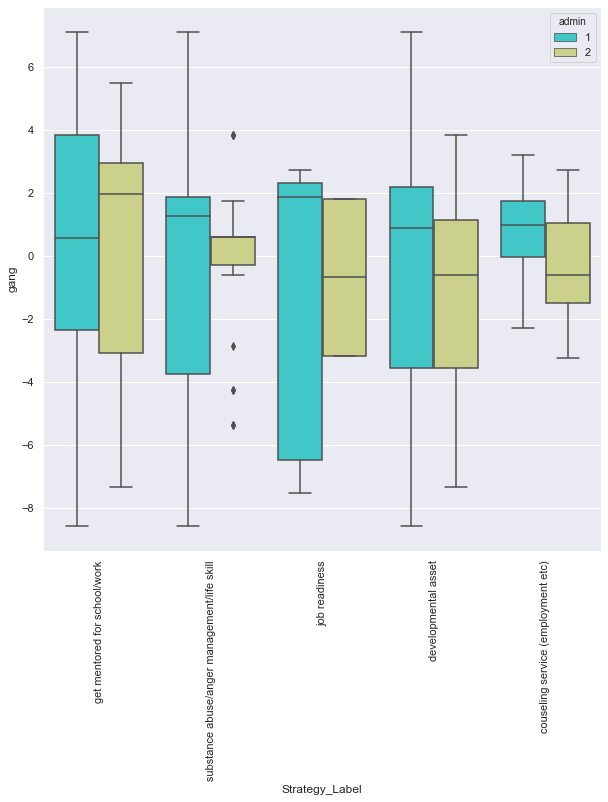

In [397]:
sns.boxplot(x='Strategy_Label',y='gang',data=xx,hue='admin',palette='rainbow')
plt.xticks(rotation=90)